Experiment 1</br>
Fix A,B,C to ground truth and estimate the fitness under different D settings</br>
Plot the curve where Y axis is the Energy and X axis is the D value</br>

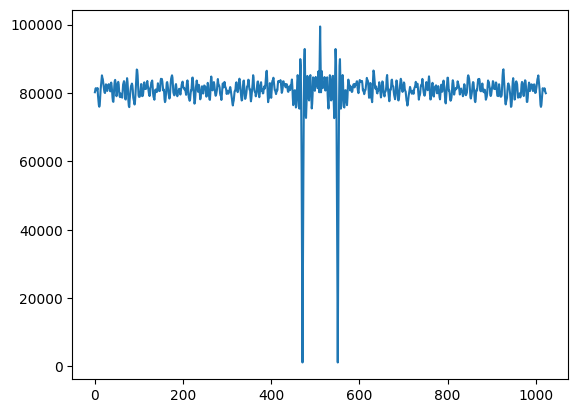

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def F2(t, A, B, C, D):
  return A*(t**B) + C*np.cos(D*t) + np.random.normal(0,1,t.shape)

n = 1000
T = np.random.random((n,1))*100 #(1000,1) 0~1
b2 = F2(T, 0.6, 1.2, 100, 0.4)

def Energy(b2, T, A, B, C, D):
  return np.sum(abs(b2-F2(T, A, B, C, D))) #回傳best A B C D

y = np.zeros((1024, 1))
# D = -5.11 : 0.01 : 5.12
for x in range(1024):
  d = -5.11 + x/100
  y[x]=Energy(b2,T,0.6,1.2,100,d) #假設已知A B C
plt.plot(y)
plt.show()

圖形出現兩個minimum 因為 cos(D*t) 可-D 特性

競爭式選擇 (tournament selection)

In [ ]:
def gene2ABCD(gene):
  A = -5.11 + np.sum(2**np.arange(10)*gene[0:10])/100  #前十碼 乘上 2的零次方～二的九次方
  B = -5.11 + np.sum(2**np.arange(10)*gene[10:20])/100
  C = -511 + np.sum(2**np.arange(10)*gene[20:30])
  D = -5.11 + np.sum(2**np.arange(10)*gene[30:40])/100
  return A,B,C,D

p = 10000
r = 0.01 #存活率
m = 1000 #突變率
generation = 10 #10 gene
survive = round(p*r)#總人口乘上生存率多少人活
#
pop = np.random.randint(0,2,(p,40)) #每個人的40個基因
fit = np.zeros((p,1))
for gener in range(generation):
  for i in range(p):
    # 計算每個人是否適合生
    gene = pop[i,:]
    A,B,C,D = gene2ABCD(gene)
    fit[i] = Energy(b2,T,A,B,C,D)
  sortf = np.argsort(fit[:,0]) #將最適合放最前
  pop = pop[sortf,:]
  for i in range(survive,p): #把100個人之後
    # 爸爸媽媽基因get部分
    fid = np.random.randint(0,survive)
    mid = np.random.randint(0,survive)
    while mid == fid:
      mid = np.random.randint(0,survive)
    mask = np.random.randint(0,2,(1,40)) #40個0,1mask
    son = pop[mid,:].copy()
    father = pop[fid,:]
    son[mask[0,:]==1] = father[mask[0,:]==1] #兒子1換成爸爸
    pop[i,:] = son
  for i in range(m): #隨機取人 做m次
    mr = np.random.randint(survive, p) # random get people
    mc = np.random.randint(0,40) #random get gene
    pop[mr,mc] = 1-pop[mr,mc]




In [ ]:
for i in range(p):
  gene = pop[i,:]
  A,B,C,D = gene2ABCD(gene)
  fit[i] = Energy(b2,T,A,B,C,D)
sortf = np.argsort(fit[:,0])
pop = pop[sortf,:]

gene = pop[0,:]
A,B,C,D = gene2ABCD(gene)
print(A,B,C,D,Energy(b2,T,A,B,C,D))

0.6799999999999997 1.17 101 -0.40000000000000036 1428.8187263690666


LPPL model

[*********************100%***********************]  1 of 1 completed


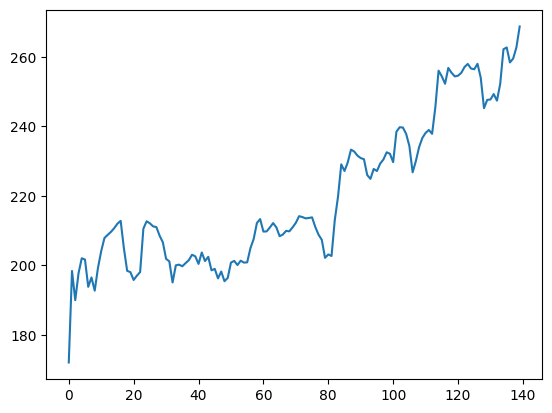

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

ticker = "AAPL"
start_date = "2025-04-08"
end_date = "2025-10-28"

data = yf.download(ticker, start=start_date, end=end_date, auto_adjust=True)
AAPL = data[['Close']].to_numpy()
plt.plot(AAPL)
